In [57]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(filepath_or_buffer="1.section_data/programmingLanguagePopularity.csv")

In [3]:
df

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2351,2022-09-01 00:00:00,php,4319
2352,2022-09-01 00:00:00,python,23460
2353,2022-09-01 00:00:00,r,4321
2354,2022-09-01 00:00:00,ruby,507


In [5]:
old_column_names = list(df.columns)
old_column_names

['m', 'TagName', 'Unnamed: 2']

In [6]:
new_name = ["DATE", "TAG", "POSTS"]
new_names_dict = {}
for name in old_column_names:
    new_names_dict[name] = new_name[old_column_names.index(name)]
print(new_names_dict)

{'m': 'DATE', 'TagName': 'TAG', 'Unnamed: 2': 'POSTS'}


In [7]:
df.rename(mapper=new_names_dict, axis=1, inplace=True)

In [8]:
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2351,2022-09-01 00:00:00,php,4319
2352,2022-09-01 00:00:00,python,23460
2353,2022-09-01 00:00:00,r,4321
2354,2022-09-01 00:00:00,ruby,507


In [9]:
df.tail(n=5)

,DATE,TAG,POSTS
2351,2022-09-01 00:00:00,php,4319
2352,2022-09-01 00:00:00,python,23460
2353,2022-09-01 00:00:00,r,4321
2354,2022-09-01 00:00:00,ruby,507
2355,2022-09-01 00:00:00,swift,2025


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2356 non-null   object
 1   TAG     2356 non-null   object
 2   POSTS   2356 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.3+ KB


In [27]:
df.groupby(by="TAG")["POSTS"].sum().sort_values(ascending=False)
# javascript has the most posts since the creation of stackoverflow

TAG
javascript    2428715
python        2029952
java          1867038
c#            1560354
php           1446125
c++            777218
r              464963
c              385756
swift          318971
ruby           225807
perl            67154
go              64697
delphi          50104
assembly        41204
Name: POSTS, dtype: int64

In [28]:
df.groupby(by="TAG").count()

,DATE,POSTS
TAG,,
assembly,170,170
c,170,170
c#,171,171
c++,170,170
delphi,170,170
go,155,155
java,170,170
javascript,170,170
perl,170,170


In [45]:
df["DATE"] = pd.to_datetime(arg=df["DATE"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2356 non-null   datetime64[ns]
 1   TAG     2356 non-null   object        
 2   POSTS   2356 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 55.3+ KB


In [47]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164
...,...,...,...
2351,2022-09-01,php,4319
2352,2022-09-01,python,23460
2353,2022-09-01,r,4321
2354,2022-09-01,ruby,507


In [51]:
pivoted_dataframe = df.pivot(index="DATE", columns="TAG")
pivoted_dataframe

POSTS                                                           \
TAG        assembly       c      c#     c++ delphi     go    java javascript   
DATE                                                                           
2008-07-01      NaN     NaN     3.0     NaN    NaN    NaN     NaN        NaN   
2008-08-01      8.0    83.0   506.0   164.0   14.0    NaN   222.0      164.0   
2008-09-01     28.0   318.0  1647.0   753.0  104.0    NaN  1133.0      636.0   
2008-10-01     15.0   303.0  1989.0   809.0  112.0    NaN  1149.0      724.0   
2008-11-01     17.0   259.0  1732.0   734.0  141.0    NaN   957.0      582.0   
...             ...     ...     ...     ...    ...    ...     ...        ...   
2022-05-01    286.0  1912.0  6275.0  3878.0  129.0  674.0  7844.0    16056.0   
2022-06-01    247.0  1666.0  6099.0  3398.0  125.0  742.0  7050.0    15229.0   
2022-07-01    212.0  1504.0  5990.0  3280.0  126.0  751.0  6651.0    15283.0   
2022-08-01    181.0  1524.0  6400.0  3291.0  132.0  869.0  6596.0    15758.0   
2022-09-01    231.0  1887.0  6479.0  3682.0  167.0  969.0  7630.0    16456.0   

                                                           
TAG          perl     php   python       r   ruby   swift  
DATE                                                       
2008-07-01    NaN     NaN      NaN     NaN    NaN     NaN  
2008-08-01   28.0   159.0    120.0     NaN   70.0     NaN  
2008-09-01  130.0   477.0    537.0     6.0  287.0     NaN  
2008-10-01  127.0   612.0    508.0     NaN  247.0     NaN  
2008-11-01   97.0   501.0    451.0     1.0  159.0     NaN  
...           ...     ...      ...     ...    ...     ...  
2022-05-01   94.0  4012.0  23138.0  4831.0  501.0  1753.0  
2022-06-01  125.0  3852.0  22295.0  4412.0  481.0  1794.0  
2022-07-01  131.0  3807.0  22627.0  4206.0  454.0  1769.0  
2022-08-01  119.0  3816.0  22152.0  4357.0  479.0  1751.0  
2022-09-01  104.0  4319.0  23460.0  4321.0  507.0  2025.0  

[171 rows x 14 columns]

In [52]:
pivoted_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2008-07-01 to 2022-09-01
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (POSTS, assembly)    170 non-null    float64
 1   (POSTS, c)           170 non-null    float64
 2   (POSTS, c#)          171 non-null    float64
 3   (POSTS, c++)         170 non-null    float64
 4   (POSTS, delphi)      170 non-null    float64
 5   (POSTS, go)          155 non-null    float64
 6   (POSTS, java)        170 non-null    float64
 7   (POSTS, javascript)  170 non-null    float64
 8   (POSTS, perl)        170 non-null    float64
 9   (POSTS, php)         170 non-null    float64
 10  (POSTS, python)      170 non-null    float64
 11  (POSTS, r)           168 non-null    float64
 12  (POSTS, ruby)        170 non-null    float64
 13  (POSTS, swift)       162 non-null    float64
dtypes: float64(14)
memory usage: 20.0 KB


In [53]:
pivoted_dataframe.head()

POSTS                                                      \
TAG        assembly      c      c#    c++ delphi  go    java javascript   
DATE                                                                      
2008-07-01      NaN    NaN     3.0    NaN    NaN NaN     NaN        NaN   
2008-08-01      8.0   83.0   506.0  164.0   14.0 NaN   222.0      164.0   
2008-09-01     28.0  318.0  1647.0  753.0  104.0 NaN  1133.0      636.0   
2008-10-01     15.0  303.0  1989.0  809.0  112.0 NaN  1149.0      724.0   
2008-11-01     17.0  259.0  1732.0  734.0  141.0 NaN   957.0      582.0   

                                                   
TAG          perl    php python    r   ruby swift  
DATE                                               
2008-07-01    NaN    NaN    NaN  NaN    NaN   NaN  
2008-08-01   28.0  159.0  120.0  NaN   70.0   NaN  
2008-09-01  130.0  477.0  537.0  6.0  287.0   NaN  
2008-10-01  127.0  612.0  508.0  NaN  247.0   NaN  
2008-11-01   97.0  501.0  451.0  1.0  159.0   NaN

In [54]:
pivoted_dataframe.columns

MultiIndex([('POSTS',   'assembly'),
            ('POSTS',          'c'),
            ('POSTS',         'c#'),
            ('POSTS',        'c++'),
            ('POSTS',     'delphi'),
            ('POSTS',         'go'),
            ('POSTS',       'java'),
            ('POSTS', 'javascript'),
            ('POSTS',       'perl'),
            ('POSTS',        'php'),
            ('POSTS',     'python'),
            ('POSTS',          'r'),
            ('POSTS',       'ruby'),
            ('POSTS',      'swift')],
           names=[None, 'TAG'])

In [55]:
pivoted_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2008-07-01 to 2022-09-01
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (POSTS, assembly)    170 non-null    float64
 1   (POSTS, c)           170 non-null    float64
 2   (POSTS, c#)          171 non-null    float64
 3   (POSTS, c++)         170 non-null    float64
 4   (POSTS, delphi)      170 non-null    float64
 5   (POSTS, go)          155 non-null    float64
 6   (POSTS, java)        170 non-null    float64
 7   (POSTS, javascript)  170 non-null    float64
 8   (POSTS, perl)        170 non-null    float64
 9   (POSTS, php)         170 non-null    float64
 10  (POSTS, python)      170 non-null    float64
 11  (POSTS, r)           168 non-null    float64
 12  (POSTS, ruby)        170 non-null    float64
 13  (POSTS, swift)       162 non-null    float64
dtypes: float64(14)
memory usage: 20.0 KB


In [67]:
java_index = pivoted_dataframe[("POSTS", "java")].index
java_values = pivoted_dataframe["POSTS", "java"].values

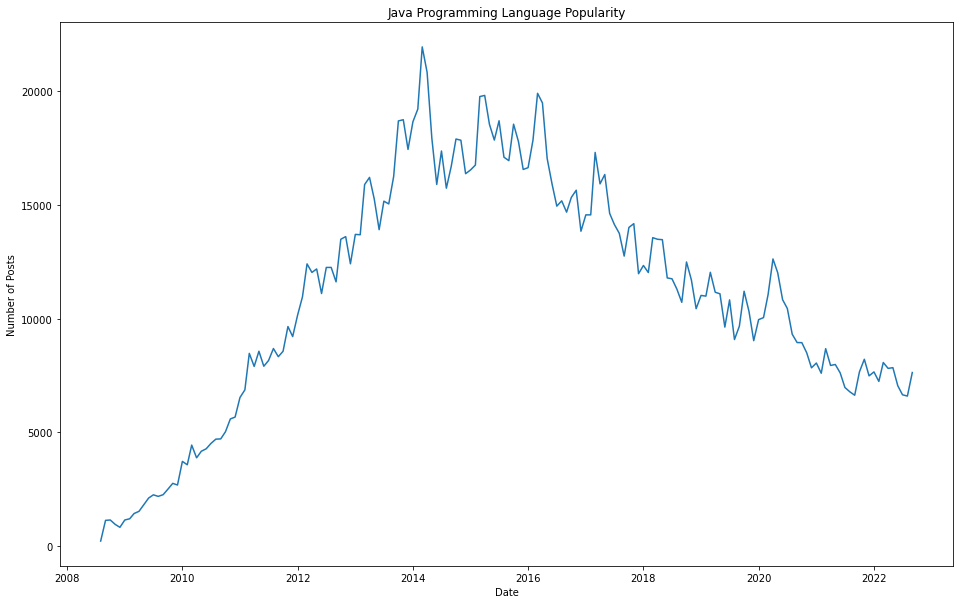

In [74]:
plt.figure(figsize=(16, 10))
plt.title("Java Programming Language Popularity")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.plot(java_index, java_values)
plt.show()

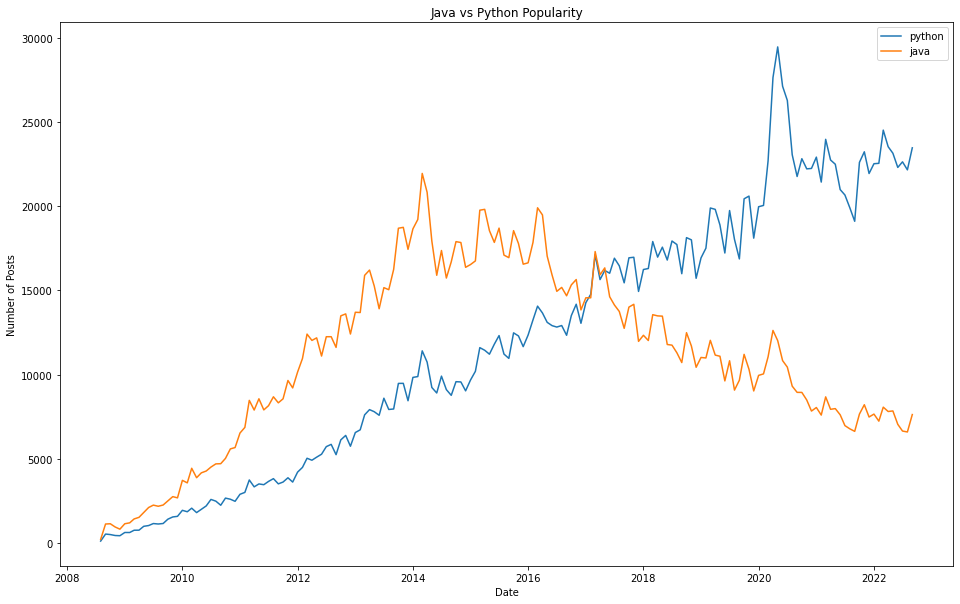

In [83]:
python_index = pivoted_dataframe[("POSTS", "python")].index
python_values = pivoted_dataframe[("POSTS", "python")].values

plt.figure(figsize=(16, 10))
plt.title("Java vs Python Popularity")

plt.xlabel("Date")
plt.ylabel("Number of Posts")

plt.plot(python_index, python_values, label="python")
plt.plot(java_index, java_values, label="java")

plt.legend()

plt.show()

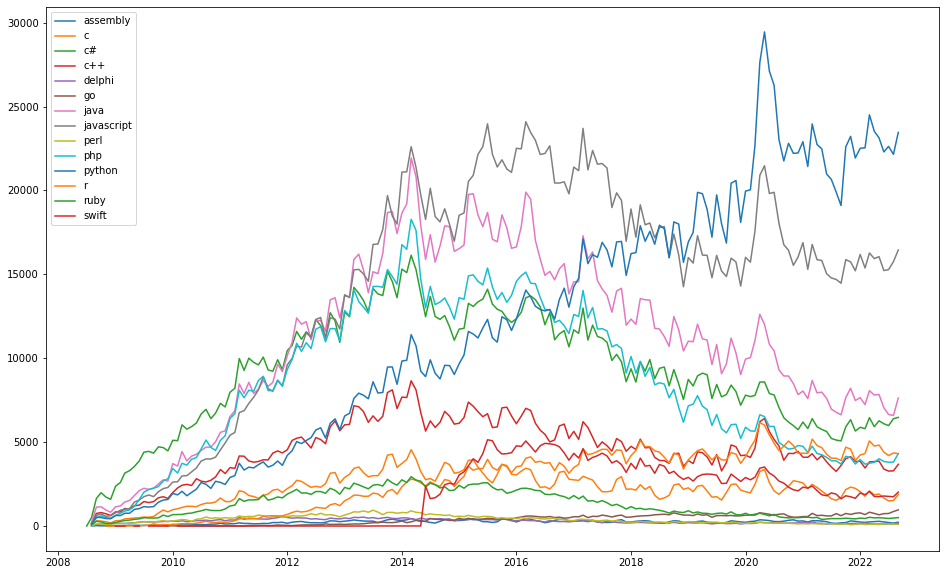

In [95]:
"""
seeing the popularity of all programming languages
"""
plt.figure(figsize=(16, 10))
columns_list = list(pivoted_dataframe.columns)
column_index = None
column_values = None
for _ in columns_list:
    plt.plot(pivoted_dataframe[_].index, pivoted_dataframe[_].values, label=_[1])
    plt.legend()